In [24]:
# from pymasker import LandsatMasker
# from pymasker import LandsatConfidence

# # load the QA band directly
# #
# # The "collection" parameter is required for landsat to specify the collection
# # number. Acceptable number: 0 (pre-collection), 1 (collection-1)
# #
# masker = LandsatMasker(r'..\Data\raw sat images-2014-2019\LC08_L1TP_036025_20170403_20170414_01_T1\LC08_L1TP_036025_20170403_20170414_01_T1_BQA.TIF', collection=1)

# # algorithm has high confidence that this condition exists
# # (67-100 percent confidence)
# conf = LandsatConfidence.low

# # Get mask indicating cloud pixels with high confidence
# mask = masker.get_snow_mask(conf)

# # save the result
# masker.save_tif(mask, 'result10.tif')

In [25]:
# Run this code in conda environment "MDN" to make MDN part working correctly.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
pd.set_option('display.max_rows' ,50)

#  field chla data preparation

In [28]:
field_data = pd.read_csv('../Data/BP_data.csv', skiprows=[1], parse_dates=['Date'], index_col= 'SampleID')
field_data

,Dataset,Date,Time,SiteNumber,latitude,Longitude,BottomDepth,sampledepth,SecchiDiskDepth,SamplingInScum,...,Diatom_Synedra,Diatom_Cocconeis,Diatom_Nitzchia,Diatom_Navicula,Diatom_Fragillaria,Diatom_Tabellaria,Diatom_Gomphenema,Diatom_Astrionella,Flagellates,Other
SampleID,,,,,,,,,,,,,,,,,,,,,
1,Buoy,2014-06-11,6:15:00 PM,1,50.586139,-105.384833,4.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Buoy,2014-06-11,6:30:00 PM,1,50.586139,-105.384833,4.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Buoy,2014-06-11,6:45:00 PM,1,50.586139,-105.384833,4.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Buoy,2014-06-11,7:00:00 PM,1,50.586139,-105.384833,4.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Buoy,2014-06-11,7:15:00 PM,1,50.586139,-105.384833,4.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110085,Calibration,2019-08-30,11:37:00 AM,1,50.586139,-105.384833,4.3,3.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110086,Calibration,2019-09-03,12:05:00 PM,1,50.586139,-105.384833,4.3,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110087,Calibration,2019-09-03,12:05:00 PM,1,50.586139,-105.384833,4.3,0.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#buoy calibration
filt_dataset = field_data['Dataset'] == 'Buoy'
field_data.loc[filt_dataset, 'Lab_Chla'] = (5 * field_data[filt_dataset]['BGAPCShallowRFU']) ** (100/99)
field_data['Lab_Chla'].head()

SampleID
1    18.533269
2    17.493540
3    16.454429
4    19.053354
5    16.454429
Name: Lab_Chla, dtype: float64

In [30]:
# drop the buoy observations associated with biofouling error
field_data = field_data[field_data['shallow_sonde_biofouling_outlier'] != 1].copy()
# drop the associated column 
field_data.drop('shallow_sonde_biofouling_outlier', axis=1, inplace=True)

In [31]:
# drop the lab observations labeld as error
field_data = field_data[field_data.Lab_chlaOutlier != 1].copy()
# drop the associated column 
field_data.drop('Lab_chlaOutlier', axis=1, inplace=True)
field_data.shape

(108778, 102)

In [32]:
# drop the observations containing bottom signal
field_data = field_data[~(field_data.SecchiDiskDepth >= field_data.BottomDepth)].copy()
field_data.shape

(108754, 102)

In [33]:
# averaging field chla data over date and station
chl_data = field_data.groupby(['Date', 'SiteNumber', 'latitude', 'Longitude']).agg({'Lab_Chla' :'median'})
chl_data

,,,,Lab_Chla
Date,SiteNumber,latitude,Longitude,
2014-01-06,2,50.585203,-105.385823,NaN
2014-01-13,2,50.585203,-105.385823,6.000000
2014-01-20,2,50.585203,-105.385823,NaN
2014-01-27,2,50.585203,-105.385823,7.000000
2014-02-03,2,50.585203,-105.385823,NaN
...,...,...,...,...
2019-09-29,1,50.586139,-105.384833,38.898296
2019-09-30,1,50.586139,-105.384833,39.946201
2019-10-01,1,50.586139,-105.384833,39.946201


In [34]:
# drop (dates,stations) with no chla measured
chl_data.dropna(axis=0, inplace=True)
chl_data

,,,,Lab_Chla
Date,SiteNumber,latitude,Longitude,
2014-01-13,2,50.585203,-105.385823,6.000000
2014-01-27,2,50.585203,-105.385823,7.000000
2014-02-10,2,50.585203,-105.385823,19.000000
2014-02-24,2,50.585203,-105.385823,14.000000
2014-03-10,2,50.585203,-105.385823,8.000000
...,...,...,...,...
2019-09-29,1,50.586139,-105.384833,38.898296
2019-09-30,1,50.586139,-105.384833,39.946201
2019-10-01,1,50.586139,-105.384833,39.946201


In [35]:
chl_data.reset_index(level=['Date', 'SiteNumber', 'latitude', 'Longitude'], inplace=True)
chl_data.index
chl_data.dtypes

Date          datetime64[ns]
SiteNumber             int64
latitude             float64
Longitude            float64
Lab_Chla             float64
dtype: object

# Extract satelite data

In [36]:
# create a dataframe for images in the directory
import os, fnmatch

listOfFiles = os.listdir('../Data/S2_img_AC_acolite_2014-2019')
pattern = "*_L2R.nc"
img_list = []
for entry in listOfFiles:
    if fnmatch.fnmatch(entry, pattern):
            img_list.append(entry)
        
img_dates = [i[8:18] for i in img_list] #for S2
#img_dates = [i[7:17] for i in img_list] #for L8
number_of_images = len(img_list)
sat_dates = pd.DataFrame(data = img_dates, columns = ['Date'], index = range(0, number_of_images))
sat_dates['#img'] = range(0, number_of_images)
sat_dates.head()


,Date,#img
0,2017_04_08,0
1,2017_04_15,1
2,2017_04_28,2
3,2017_05_05,3
4,2017_05_18,4


In [37]:
sat_dates['Date'] = pd.to_datetime(sat_dates['Date'], format='%Y_%m_%d')

In [38]:
# create a dataframe from merging chla data and image names (based on same date)
merged_data = pd.merge(chl_data, sat_dates, on = 'Date')
merged_data

,Date,SiteNumber,latitude,Longitude,Lab_Chla,#img
0,2017-05-18,1,50.586139,-105.384833,3.033477,4
1,2017-06-07,1,50.586139,-105.384833,3.033477,5
2,2017-07-04,1,50.586139,-105.384833,5.595528,6
3,2017-07-04,3,50.597500,-105.408000,7.290000,6
4,2017-07-17,1,50.586139,-105.384833,20.093948,7
...,...,...,...,...,...,...
96,2019-09-07,1,50.586139,-105.384833,55.694448,67
97,2019-09-15,1,50.586139,-105.384833,39.422214,38
98,2019-09-20,1,50.586139,-105.384833,36.803339,68
99,2019-09-22,1,50.586139,-105.384833,33.663162,39


In [39]:
# extracting reflectance values of correspond pixels to in-situ data
from netCDF4 import Dataset
Ref = [[]*0]*0
pixel = [[]*0]*0
for index, row in merged_data.iterrows():
    dataset = Dataset('../Data/S2_img_AC_acolite_2014-2019/' + img_list[merged_data.loc[index]['#img']])
    keys = dataset.variables.keys()
    dataset_1D = {}
    for key in keys:
        dataset_1D[key] = dataset.variables[key][:].flatten(order='C')

    dist = ((dataset_1D['lon'][:] - row['Longitude']) ** 2 + (dataset_1D['lat'][:] - row['latitude']) ** 2) ** (1/2) 
    idx_mins = dist.argsort()[:9]
    idx_min = idx_mins[1]
    
    pix_Y = idx_min // dataset.dimensions['x'].size
    pix_X = idx_min % dataset.dimensions['x'].size
    pix = [pix_Y, pix_X]
    pixel.append(pix)
    
    Rrs = []
    for key in keys:
        if 'rhos' in key:   #'Rrs'       
            Rrs.append((dataset_1D[key][idx_mins]).mean())
    Ref.append(Rrs)

the result of above method to extract reflectance values was checked with PixEx method in SNAP. there is slight different in extracted pixelss. from 9 pixels extrscted 2 of them were different between two mwthods. but dont think it has much effect on results. also the above method put nan for if the window contains even one nan value. which I think makes sense to avoid adjacency effects of cloud and so on. however it can be replaced with nonmean mehthod.

In [40]:
# name of columns to add to dataframe
added_ref = ['Rrs_443', 'Rrs_492', 'Rrs_560' , 'Rrs_665', 'Rrs_704', 'Rrs_740', 'Rrs_783', 'Rrs_833', 'Rrs_865', 'Rrs_1614' , 'Rrs_2202'] # for S2
#added_ref = ['Rrs_443', 'Rrs_483', 'Rrs_561' , 'Rrs_655', 'Rrs_865', 'Rrs_1609', 'Rrs_2201'] # for L8

In [41]:
# crate a dataframe of ref data
sat_ref = pd.DataFrame(data = Ref, columns = added_ref)
sat_ref

,Rrs_443,Rrs_492,Rrs_560,Rrs_665,Rrs_704,Rrs_740,Rrs_783,Rrs_833,Rrs_865,Rrs_1614,Rrs_2202
0,-0.000811,0.006912,0.025378,0.006343,0.006432,0.004127,0.003999,0.004411,0.003048,0.000397,0.000111
1,-0.001169,0.008212,0.032120,0.009282,0.008689,0.005938,0.005988,0.005851,0.005276,0.000762,0.000002
2,0.003019,0.011201,0.033662,0.012231,0.012178,0.011383,0.011353,0.009117,0.009228,0.001217,0.000000
3,0.002591,0.010150,0.031745,0.011418,0.011326,0.011073,0.011017,0.008508,0.009273,0.000703,0.000147
4,0.046877,0.049268,0.062739,0.038169,0.046784,0.057761,0.056028,0.051703,0.048390,0.001617,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
96,0.085765,0.109213,0.129542,0.111546,0.129168,0.139170,0.141631,0.156725,0.143589,0.121286,0.090240
97,0.008101,0.015145,0.033723,0.011708,0.021178,0.016259,0.014724,0.020243,0.014585,0.005157,0.000000
98,0.019240,0.023539,0.042011,0.022465,0.028510,0.023840,0.022244,0.020224,0.018670,0.006617,0.000000
99,-0.006841,0.007471,0.035824,0.015088,0.020839,0.010899,0.010449,0.009037,0.007666,0.001537,0.000000


# Merge sat and field data


In [42]:
# concating chla and ref dataframes 
samples = pd.concat([merged_data, pd.DataFrame(pixel,columns=['pix_Y','pix_X']), sat_ref], axis = 1)
print(samples.shape)
samples

(101, 19)


,Date,SiteNumber,latitude,Longitude,Lab_Chla,#img,pix_Y,pix_X,Rrs_443,Rrs_492,Rrs_560,Rrs_665,Rrs_704,Rrs_740,Rrs_783,Rrs_833,Rrs_865,Rrs_1614,Rrs_2202
0,2017-05-18,1,50.586139,-105.384833,3.033477,4,342,491,-0.000811,0.006912,0.025378,0.006343,0.006432,0.004127,0.003999,0.004411,0.003048,0.000397,0.000111
1,2017-06-07,1,50.586139,-105.384833,3.033477,5,342,491,-0.001169,0.008212,0.032120,0.009282,0.008689,0.005938,0.005988,0.005851,0.005276,0.000762,0.000002
2,2017-07-04,1,50.586139,-105.384833,5.595528,6,342,491,0.003019,0.011201,0.033662,0.012231,0.012178,0.011383,0.011353,0.009117,0.009228,0.001217,0.000000
3,2017-07-04,3,50.597500,-105.408000,7.290000,6,322,464,0.002591,0.010150,0.031745,0.011418,0.011326,0.011073,0.011017,0.008508,0.009273,0.000703,0.000147
4,2017-07-17,1,50.586139,-105.384833,20.093948,7,342,491,0.046877,0.049268,0.062739,0.038169,0.046784,0.057761,0.056028,0.051703,0.048390,0.001617,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2019-09-07,1,50.586139,-105.384833,55.694448,67,342,491,0.085765,0.109213,0.129542,0.111546,0.129168,0.139170,0.141631,0.156725,0.143589,0.121286,0.090240
97,2019-09-15,1,50.586139,-105.384833,39.422214,38,342,491,0.008101,0.015145,0.033723,0.011708,0.021178,0.016259,0.014724,0.020243,0.014585,0.005157,0.000000
98,2019-09-20,1,50.586139,-105.384833,36.803339,68,342,491,0.019240,0.023539,0.042011,0.022465,0.028510,0.023840,0.022244,0.020224,0.018670,0.006617,0.000000
99,2019-09-22,1,50.586139,-105.384833,33.663162,39,342,491,-0.006841,0.007471,0.035824,0.015088,0.020839,0.010899,0.010449,0.009037,0.007666,0.001537,0.000000


In [43]:
#drop missing values in ref 
samples.dropna(axis=0, inplace=True)
samples

,Date,SiteNumber,latitude,Longitude,Lab_Chla,#img,pix_Y,pix_X,Rrs_443,Rrs_492,Rrs_560,Rrs_665,Rrs_704,Rrs_740,Rrs_783,Rrs_833,Rrs_865,Rrs_1614,Rrs_2202
0,2017-05-18,1,50.586139,-105.384833,3.033477,4,342,491,-0.000811,0.006912,0.025378,0.006343,0.006432,0.004127,0.003999,0.004411,0.003048,0.000397,0.000111
1,2017-06-07,1,50.586139,-105.384833,3.033477,5,342,491,-0.001169,0.008212,0.032120,0.009282,0.008689,0.005938,0.005988,0.005851,0.005276,0.000762,0.000002
2,2017-07-04,1,50.586139,-105.384833,5.595528,6,342,491,0.003019,0.011201,0.033662,0.012231,0.012178,0.011383,0.011353,0.009117,0.009228,0.001217,0.000000
3,2017-07-04,3,50.597500,-105.408000,7.290000,6,322,464,0.002591,0.010150,0.031745,0.011418,0.011326,0.011073,0.011017,0.008508,0.009273,0.000703,0.000147
4,2017-07-17,1,50.586139,-105.384833,20.093948,7,342,491,0.046877,0.049268,0.062739,0.038169,0.046784,0.057761,0.056028,0.051703,0.048390,0.001617,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2019-09-07,1,50.586139,-105.384833,55.694448,67,342,491,0.085765,0.109213,0.129542,0.111546,0.129168,0.139170,0.141631,0.156725,0.143589,0.121286,0.090240
97,2019-09-15,1,50.586139,-105.384833,39.422214,38,342,491,0.008101,0.015145,0.033723,0.011708,0.021178,0.016259,0.014724,0.020243,0.014585,0.005157,0.000000
98,2019-09-20,1,50.586139,-105.384833,36.803339,68,342,491,0.019240,0.023539,0.042011,0.022465,0.028510,0.023840,0.022244,0.020224,0.018670,0.006617,0.000000
99,2019-09-22,1,50.586139,-105.384833,33.663162,39,342,491,-0.006841,0.007471,0.035824,0.015088,0.020839,0.010899,0.010449,0.009037,0.007666,0.001537,0.000000


# abd pixel handeling

In [44]:
samples.to_csv('vis_forbadpixeldetermination.csv')

In [23]:
bad_pixels = pd.read_csv('badpixels_L8_samedaySamples.csv')  

# feature engineering


In [249]:
y = samples.Lab_Chla
X = samples.drop('Lab_Chla', axis = 1)
X.head()

,Date,SiteNumber,latitude,Longitude,#img,Rrs_443,Rrs_483,Rrs_561,Rrs_655,Rrs_865,Rrs_1609,Rrs_2201
1,2014-08-08,1,50.586139,-105.384833,1,0.005540,0.006372,0.009167,0.006044,0.008112,0.000165,0.000000
2,2014-08-17,1,50.586139,-105.384833,2,0.006232,0.006610,0.009521,0.005304,0.003543,0.000453,0.000000
3,2014-09-02,1,50.586139,-105.384833,3,0.001037,0.003186,0.008180,0.005115,0.001826,0.000000,0.000067
4,2014-09-02,2,50.585203,-105.385823,3,0.000691,0.003179,0.008161,0.005107,0.001627,0.000000,0.000075
6,2015-05-23,1,50.586139,-105.384833,8,0.001779,0.002868,0.004902,0.003020,0.002147,0.000000,0.000192


In [250]:
y_trans_log10 = np.log10(y)
len(y_trans_log10)

55

In [232]:
# computing traditional models
X['NDCI'] = (X['Rrs_704']- X['Rrs_665']) / (X['Rrs_704']+  X['Rrs_665'])
X['M09'] = X['Rrs_704'] / X['Rrs_665']
#X['T07'] = X['Rrs_665'] / X['Rrs_560']
X['D05'] = (X['Rrs_665']**(-1) - X['Rrs_704']**(-1)) * X['Rrs_740']
X['OC2'] = X['Rrs_492'] / X['Rrs_560']
X['OC3'] = pd.concat([X['Rrs_492'],X['Rrs_443']], axis=1).max(axis=1) / X['Rrs_560']  

KeyError: 'Rrs_704'

In [233]:
selected_features = []
selected_features = added_ref[:6]
#selected_features.append('SiteNumber')
# selected_features.append('NDCI')
# selected_features.append('M09')
# selected_features.append('D05')
X_sel = pd.DataFrame(X[selected_features])
X_sel

,Rrs_443,Rrs_483,Rrs_561,Rrs_655,Rrs_865,Rrs_1609
1,0.005577,0.006382,0.009270,0.006066,0.008129,0.000153
3,0.001039,0.003282,0.008284,0.005233,0.001952,0.000000
4,0.000763,0.003132,0.008051,0.005083,0.001604,0.000013
6,0.001750,0.002876,0.004905,0.003055,0.002193,0.000000
7,0.002243,0.004267,0.010517,0.005284,0.003343,0.000000
8,0.002241,0.004270,0.010058,0.005135,0.003359,0.000000
9,0.002689,0.004469,0.009490,0.005172,0.003049,0.000000
19,0.001862,0.004112,0.010115,0.005387,0.002962,0.000000
20,0.001782,0.003887,0.009320,0.004943,0.002938,0.000000
21,0.001535,0.003834,0.009973,0.005172,0.004463,0.000006


In [193]:
# filt_outliers = X['Rrs_443'].between(X['Rrs_443'].quantile(.05), X['Rrs_443'].quantile(.95))
# X[filt_outliers].T.plot()
# X = X[filt_outliers]
# y = y[filt_outliers]

(array([[ 1., 26., 13.,  4.,  1.,  5.,  1.,  1.,  0.,  0.],
        [ 1., 25., 13.,  5.,  1.,  5.,  2.,  0.,  0.,  0.],
        [ 6., 19.,  8., 10.,  6.,  3.,  0.,  0.,  0.,  0.],
        [ 6., 17., 14.,  7.,  4.,  3.,  0.,  1.,  0.,  0.],
        [ 1., 25., 14.,  3.,  4.,  4.,  1.,  0.,  0.,  0.],
        [ 0.,  0., 48.,  1.,  0.,  1.,  0.,  0.,  1.,  1.]]),
 array([-1.73010809, -1.03782843, -0.34554876,  0.34673091,  1.03901058,
         1.73129024,  2.42356991,  3.11584958,  3.80812925,  4.50040892,
         5.19268858]),
 <a list of 6 Lists of Patches objects>)

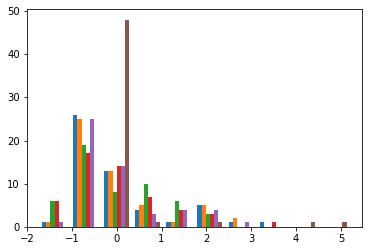

In [236]:
#from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sel_standard = scaler.fit_transform(X_sel)
plt.hist(X_sel_standard)

# Model development

In [204]:
## import models
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
#from sklearn.svm import SVR
#from sklearn.linear_model import LinearRegression
#from sklearn.cross_decomposition import PLSRegression

#model = DecisionTreeRegressor(max_depth=100)
#model = RandomForestRegressor(n_estimators=100, random_state=0)
model = XGBRegressor(booster='dart',n_estimators=100, random_state=0, learning_rate = 0.1)
#model = SVR(kernel = 'rbf', gamma = 'scale')
#model = LinearRegression()
#model = PLSRegression(n_components = 4)

In [205]:
# create a pipeline
from sklearn.pipeline import Pipeline
my_pipeline = Pipeline(steps=[('model', model)])

In [206]:
# cross validation and accuracy assessment of model
from sklearn.model_selection import cross_val_score
mae = 10**(-1 * cross_val_score(my_pipeline, X_sel, y_trans_log10, cv=5, scoring='neg_mean_absolute_error').mean())
mae

1.885551137662659

In [166]:
# getting predictions from cross validation
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(my_pipeline, X_sel, y_trans_log10, cv=5)

# Implement MDN

In [49]:
# prepare and save data to import to MDN
sat_ref_MDN = np.array(sat_ref.dropna(axis=0))[:,:7]
print(sat_ref_MDN)
np.savetxt("sat_ref_MDN.csv", sat_ref_MDN, delimiter=",")

[[-2.09765640e-04  2.31973897e-03  8.06056708e-03  2.00239499e-03
   2.08752463e-03  1.21714722e-03  1.30019512e-03]
 [-3.99375305e-04  2.58346763e-03  1.01522617e-02  2.96770618e-03
   2.67801806e-03  1.90786261e-03  1.90896029e-03]
 [ 9.48206696e-04  3.61236162e-03  1.06873764e-02  3.89533490e-03
   3.82831879e-03  3.56730237e-03  3.54983029e-03]
 [ 8.51780933e-04  3.12810019e-03  1.01393424e-02  3.63314780e-03
   3.53770959e-03  3.55285197e-03  3.56430630e-03]
 [ 1.49659170e-02  1.57210678e-02  1.99800078e-02  1.21579515e-02
   1.49987200e-02  1.83660220e-02  1.79224927e-02]
 [ 1.52818887e-02  1.60253663e-02  2.12811250e-02  1.33921690e-02
   1.68580022e-02  1.95817556e-02  1.89502686e-02]
 [ 1.06544383e-02  1.25398366e-02  1.69702452e-02  1.03156148e-02
   1.25483228e-02  1.72038171e-02  1.82624850e-02]
 [ 1.07370235e-03  3.94613715e-03  1.22233583e-02  5.90970926e-03
   7.70800002e-03  4.24789498e-03  3.84034286e-03]
 [ 7.11516710e-04  3.70116881e-03  1.20223342e-02  5.85199846e-0

In [50]:
# Run MDN 
! python -m MDN --sensor S2A sat_ref_MDN.csv

Min Rrs: [-0.00177937  0.00084586  0.00492017  0.00109415  0.00117368  0.00092856
  0.00099052]
Max Rrs: [0.01528189 0.01602537 0.02183341 0.01489365 0.02050217 0.01958176
 0.01895027]
Generating estimates for 85 data points
Min: [5.209888]
Max: [157.77429]
Saving estimates at location "MDN_sat_ref_MDN.csv"



100%|##########| 10/10 [00:35<00:00,  3.53s/it]


In [51]:
# read the output of MDN model and make format consistent with other models' outputs 
y_pred = pd.read_csv('MDN_sat_ref_MDN.csv')
y_pred = np.transpose(np.array(np.log10(y_pred)))
y_pred

array([[1.32628516, 1.248368  , 1.07146654, 1.13672469, 1.71897503,
        1.83735583, 1.74451895, 1.68740277, 1.66135705, 2.14498798,
        2.14030194, 1.95234145, 1.11372528, 0.71682839, 0.89824412,
        0.98115398, 0.7353698 , 1.23906635, 1.15433708, 1.9059268 ,
        2.16703072, 2.18350695, 2.19803623, 2.05738578, 1.6874759 ,
        1.72284978, 0.93889177, 1.91344025, 1.61222741, 1.25280851,
        1.17368897, 1.20888663, 1.19518439, 1.28083648, 1.33932414,
        1.4143271 , 1.15228623, 1.6252262 , 1.541398  , 1.53679623,
        1.38158262, 1.60601109, 2.04428899, 1.61088949, 1.79297526,
        1.59594979, 1.74128368, 1.71188655, 1.75027719, 1.7917345 ,
        1.63098457, 1.64834469, 1.46393903, 1.46433737, 1.06693098,
        1.18049051, 1.21849186, 1.15069011, 1.24556313, 1.2412626 ,
        1.30043354, 0.87604632, 1.4329483 , 1.19412375, 1.26983371,
        1.67695064, 1.69038734, 1.77712304, 1.89343548, 1.98199664,
        1.47343796, 1.26516182, 0.84286887, 1.34

# bst_oli (Cao et al., 2020)

In [237]:
# Rayleigh-corrected reflectance should be intrudeced to the model as input
import xgboost as xgb
bst = xgb.Booster({'nthread': 4})  # init model
bst.load_model('bst_oli\chl_bst_model_release.model')  # load data
dtest = xgb.DMatrix(X_sel_standard)
y_pred = np.log10(bst.predict(dtest))
y_pred

array([1.1650392 , 1.0744643 , 1.0744643 , 1.0744643 , 1.0744643 ,
       1.0744643 , 1.0744643 , 1.0744643 , 1.0744643 , 1.0744643 ,
       0.8818123 , 1.2071403 , 1.3295841 , 0.8071258 , 0.9239095 ,
       1.384474  , 1.0663232 , 1.0744643 , 1.0744643 , 1.4082023 ,
       0.87151104, 1.045853  , 0.7856911 , 1.0744643 , 1.0744643 ,
       1.0744643 , 0.99658287, 0.99658287, 0.99658287, 0.8071258 ,
       1.0744643 , 0.8658826 , 0.8071258 , 0.8071258 , 1.0744643 ,
       1.0744643 , 1.4556514 , 0.9858441 , 0.8071258 , 1.2071403 ,
       1.449587  , 1.0744643 , 1.0744643 , 1.0744643 , 0.8818123 ,
       0.99658287, 0.94254756, 0.9239095 , 0.99658287, 0.8071258 ,
       0.99658287, 0.9239095 ], dtype=float32)

# validation performance

In [239]:
from scipy.io import savemat
savemat('y_pred.mat', {'y_pred': y_pred})
#y_trans_log10[y_trans_log10 == 0] = 0.05
savemat('y.mat', {'y': np.array(y_trans_log10)})

In [ ]:
img_list[62]

In [ ]:
from netCDF4 import Dataset
#Ref = [[]*0]*0 
#for index, row in merged_data.iterrows():
dataset = Dataset('../S2_img_AC_acolite_2014-2019/' + img_list[62])
keys = dataset.variables.keys()
dataset_1D = {}
for key in keys:
    dataset_1D[key] = dataset.variables[key][:].flatten()
    


In [ ]:
Ref = [[]*0]*0 
for i in range(0,len(dataset_1D['lat'])):
    if dataset_1D['l2_flags'][i] == 0:
        Rrs = []
        for key in keys:
            if 'Rrs' in key:        
                Rrs.append(dataset_1D[key][i])
        Ref.append(Rrs)
        
ww = (np.array(Ref))   
ww = ww[:, :6]

In [ ]:
ww

In [ ]:
# from sklearn.preprocessing import scale 
# ww_scaled = scale(ww)
# ww_scaled

In [ ]:
def reject_outliers(data, m):
    return abs(data - np.median(data)) > m * np.std(data)

idx = ww.copy()
for i in range(0, ww.shape[1]):
    data = ww[:,i]
    idx[:,i] = reject_outliers(data, 2)

idx_outlier = idx.sum(axis=1) != 0

In [ ]:
sum(idx_outlier)

In [ ]:
ww

In [ ]:
model.fit(X, y_trans_log10)
values_pred = model.predict(ww)
idx_values_pred_outlier = reject_outliers(values_pred, 2)
values_pred[idx_values_pred_outlier] = 'NaN'
values_pred_unlog = 10 ** values_pred
values_pred_unlog[idx_outlier] = 'NaN'


In [ ]:
sum(idx_values_pred_outlier)

In [ ]:
image_flat = np.array(dataset_1D['Rrs_492']) 
idx = np.isnan(image_flat)
image_flat[~idx]= values_pred_unlog

In [ ]:
image = image_flat.reshape(dataset.dimensions['y'].size, dataset.dimensions['x'].size)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

ax = plt.figure(figsize = [16,12])
heatmap = plt.imshow(image, cmap='jet', interpolation='nearest')

cbar = plt.colorbar(heatmap, cax = ax.add_axes([.15, 0.15, 0.03, 0.7]))
cbar.ax.tick_params(labelsize=20) 

In [ ]:
ax.savefig('SVR_62.png',dpi=500, format='png')